# ELEC3105 - Midterm Assignment - 2024, T2

## Total Marks 90 + 9 + 1. Maximum mark: 90

You emerge from your spacecraft, the ramp descending into the endless dusty expanse, two silhouettes on their new assignment.

A stark, alien landscape greets you with an oppressive heat and a blinding sun pierces through your eyes. 

The desert winds carries a brand new scent for your sences. 

This place feels different than anything you have experienced before. 

Each step onto the coarse sand feels foreign, yet you both move with the unyielding determination of two Electrical Engineers on a mission.

Bruce and you have arrived to ARRAKIS!

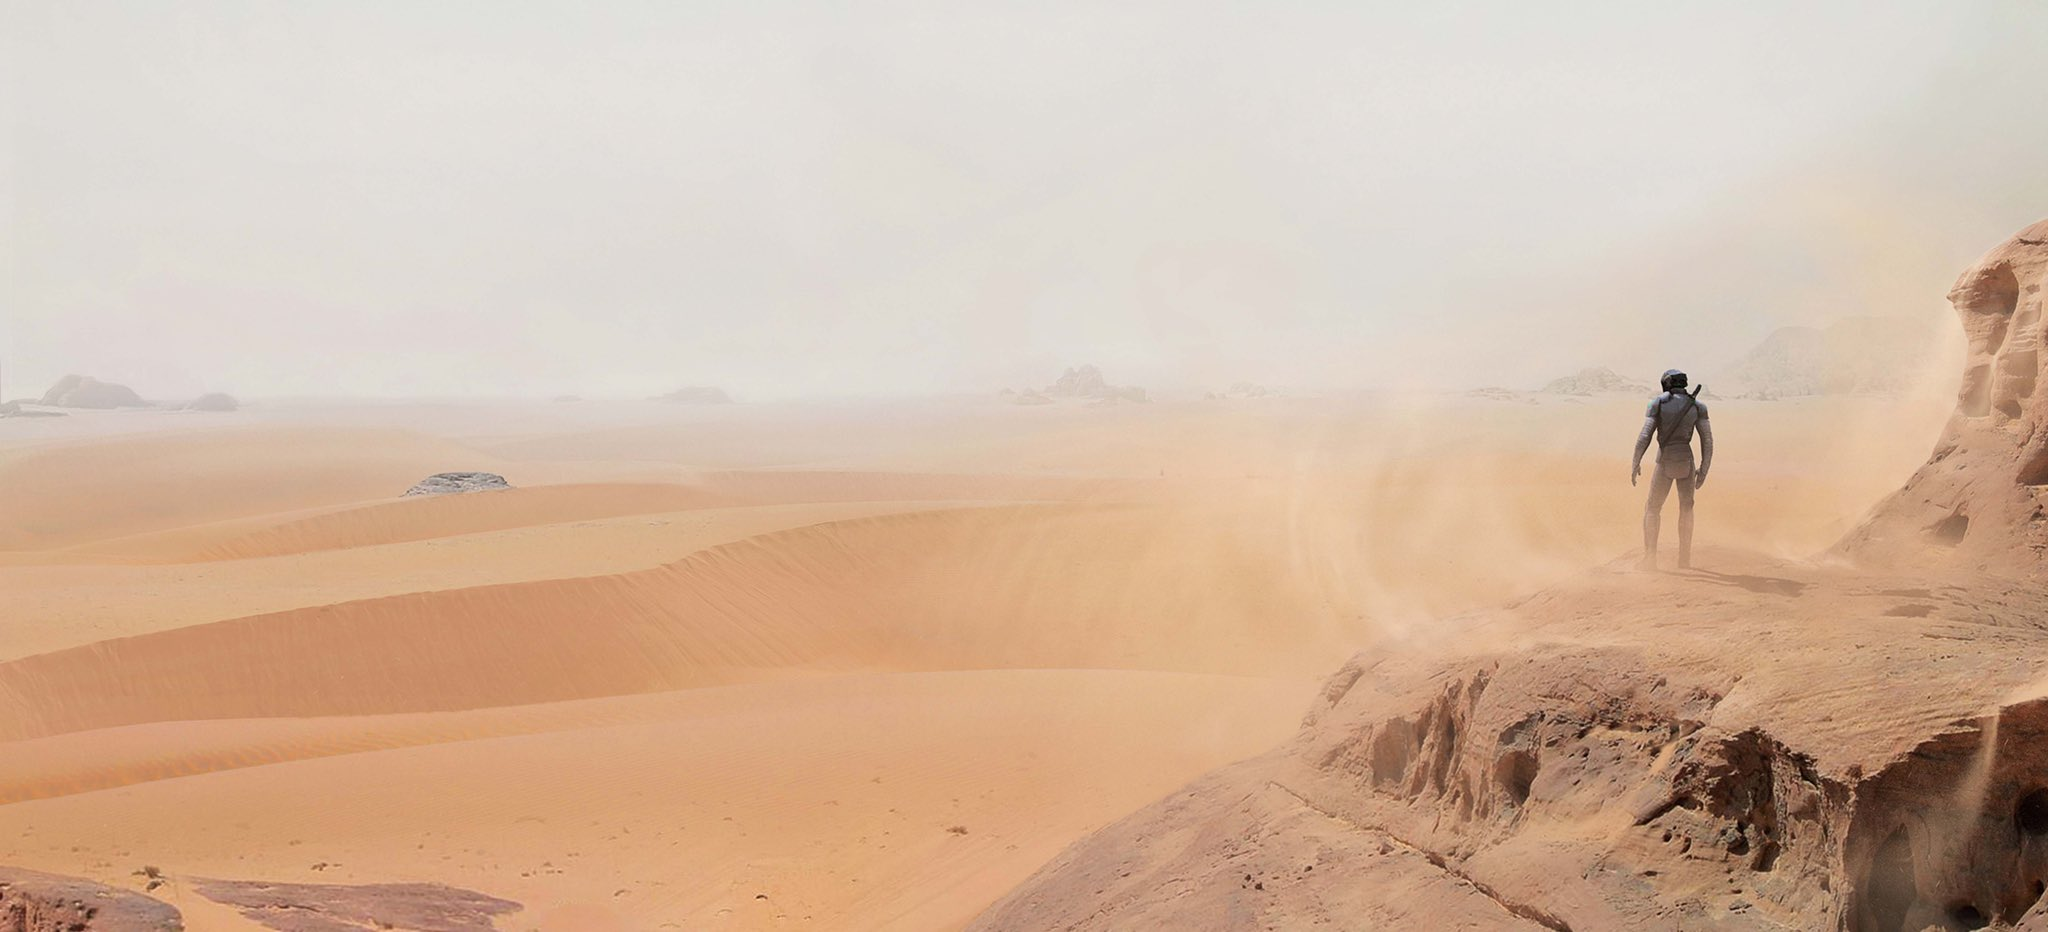

In [2]:
from IPython.display import Image
Image(filename="Figures\Arrakis.jpg",height=500)

As House Harkonnen reluctantly withdrew from Arrakis, leaving behind a legacy of brutal exploitation and environmental neglect, House Atreides embarkes on an ambitious project to transform the desert planet.

Duke Leto Atreides, driven by a vision of sustainability and harmony, is looking forward to a new future.

A future where spice mining and all other activities on the planet are enviromentally sustainable.

A future where wind turbines and solar panels generate clean energy. 

The goal of House Atreides; to reduce dependency on the spice melange and to create a more habitable environment, signaling a new era for the beleaguered inhabitants of Arrakis.

And you are there to help. 

## Part 1 - Establishing Renewable Generation (40 Marks)

Unlike your previous projects, your work this time was supposed to be easy as your colleague Bruce has everything under control. 

Bruce's solution for bringing renewable energy to Arrakis: Offshore Wind!

You quickly realise that there are many issues with his solution...

### 1.1 Figuring out the mess (16 Marks)
Your first step, as you try to assess the proposed solution is to look at his assumptions. 

The following code plots the Weibull distribution for $k = 2$ (Rayleigh distribuytion) for the wind on Earth, where Bruce got his idea. You can also use it to plot the distribution of the wind for your proposed location using the value for   $\text{arrakis_wind_scale}$   given in your variables.

The Rayleigh distribution is a probability density function that is described using one variable $c$, which in your case is represented by $\text{earth_wind_scale}$ and $\text{arrakis_wind_scale}$. 

$f(v) = \frac{2v}{c^2} \exp \left[ -\left( \frac{v}{c} \right)^2 \right]$

Larger scale factors $c$ shift the curve toward higher windspeeds. The  relationship between scaling factor $c$ and average wind speed $\bar{v}$ can be calculated as:

$\bar{v} = \int_{0}^{\infty} v \cdot f(v) \, dv = \int_{0}^{\infty} \frac{2v^2}{c^2} \exp \left[ -\left( \frac{v}{c} \right)^2 \right] dv = \frac{\sqrt{\pi}}{2}c \approx 0.886c$

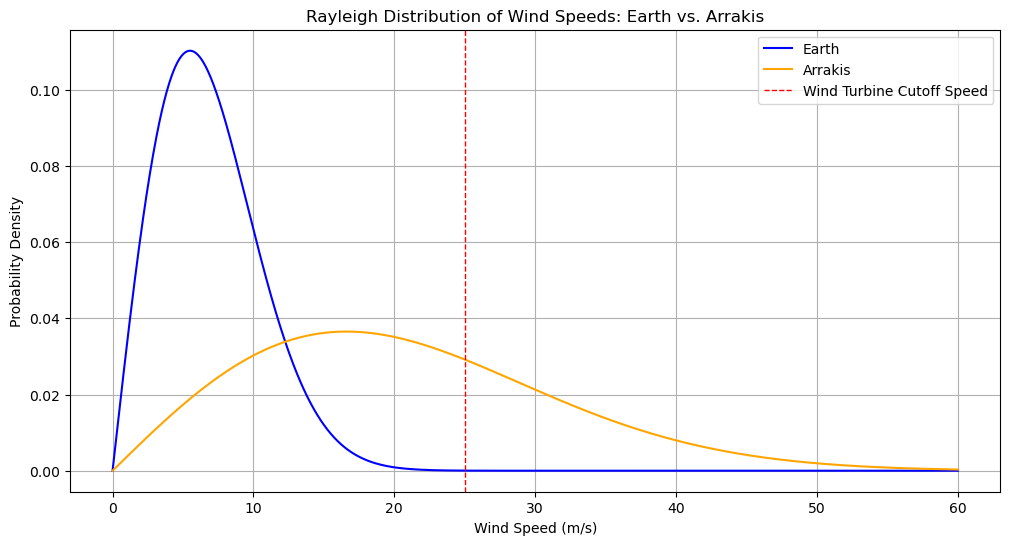

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rayleigh

# Parameters for Rayleigh distribution
earth_wind_scale = 5.5  # Rayleigh scale parameter (mode) for Earth
arrakis_wind_scale = 16.6  # Rayleigh scale parameter (mode) for Arrakis

# Generate wind speeds for the new range
wind_speeds_extended = np.linspace(0, 60, 1000)

# Rayleigh distribution for Earth
earth_pdf_extended = rayleigh.pdf(wind_speeds_extended, scale=earth_wind_scale)

# Rayleigh distribution for Arrakis with increased wind
arrakis_pdf_extended = rayleigh.pdf(wind_speeds_extended, scale=arrakis_wind_scale)

# Cutoff speed for a typical wind turbine (example value)
cutoff_speed = 25  # in m/s

# Create plot with cutoff line and extended wind speed range
plt.figure(figsize=(12, 6))

plt.plot(wind_speeds_extended, earth_pdf_extended, label='Earth', color='blue')
plt.plot(wind_speeds_extended, arrakis_pdf_extended, label='Arrakis', color='orange')

# Adding cutoff line
plt.axvline(cutoff_speed, color='red', linestyle='--', label='Wind Turbine Cutoff Speed', linewidth=1)

# Adding labels and title
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Probability Density')
plt.title('Rayleigh Distribution of Wind Speeds: Earth vs. Arrakis')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


#### Question 1 (7 Marks): 
Based on the available information, calculate the available energy in the wind for Earth and Arrakis and qualitatively compare the two values. 

Suppose that GE Vernova's 3 MW platform (https://www.gevernova.com/wind-power/onshore-wind/3mw-platform) is being used at both locations. Considering standard air density, the above Rayleigh statistics and an overall efficiency of 30% estimate the annual energy (kWh/yr) that can be delivered under ideal conditions by the wind turbine in the two locations.

Notes: 
1. You can ignore the cut-in and cut-off speeds for this calculation. 
2. The GE 3 MW platform is available in three different blade sizes and diameters (see page 6 in the datasheet). You can use either of the three options for your calculations. 

#### Question 2 (5 Marks)

What is the definition of capacity factor?

What is the capacity factor of the wind turbine you have selected?

Notes: 
1. Assume that one year on both planets has 8760 hours. 

#### Question 3 (4 Marks)

Considering the cut-off speed of the wind turbines, explain the limitations of your previous power calculations. 

What are the challenges of operating wind speeds with the characteristics of the wind in Arrakis?

#### Bonus Question 1 (4 Marks) 

Assuming that the wind turbine has a cut-in speed of 5 m/s and a cut-off speed of 25 m/s, calculate the available energy that can be extracted per year in Arrakis for each wind speed at steps of 1 m/s. Plot the corresponding results as a function of the wind speed. 

### 1.2 Going Solar (24 Marks)

Leaving the plans for building offshore wind better suited to the Illawara offshore Renewable Energy Zone (REZ - https://www.dcceew.gov.au/energy/renewable/offshore-wind/areas/illawarra), you start working towards a large-scale solar plant that will be able to support the operation at one of the remote bases you are trying to electrify. 

The local load at the base that you are designing first is the following: 
1. One Spice Melange Harvester which charges at $P_{Harv}$ MW for 8 hours a day. 
2. Three Carryalls for transporting the Harvester at $P_{Carr}$ also charging for 8 hours a day

#### Question 4 (1 Mark):

What is the total energy that is required by the two loads each day?

#### Question 5 (4 Marks):

Your project is somehow supported by the Australian Government and its "Future Made in Australia" plan so you are limited in the PV modules that you can use for your farm. Your choice is the Tindo Solar Karra 550WG2H. The datasheet is available in the link below and in Moodle. 

https://service.tindosolar.com.au/portal/api/kbArticles/285173000001431001/locale/en/attachments/0dpghabfe741b9d9a4ca2bcefe7501b17b0e0/content?portalId=edbsn4e77c722a0d0dd5d0b041960feee3e5dbc67c58424ebe1935292ddb9a5e14777&inline=true

Using the available information, plot approximate I-V and P-V curves for the panel, considering standard testing conditions (STC) and also for $500 W/m^2$. Include in your 2 plots (separate I-V and P-V plots) all the necessary values.  

#### Question 6 (5 Marks)

Considering the simplified solar irradiance pattern for one day in Arrakis, which is shown in the following figure, calculate the total available energy that you can extract from a single panel over one day at STC.  

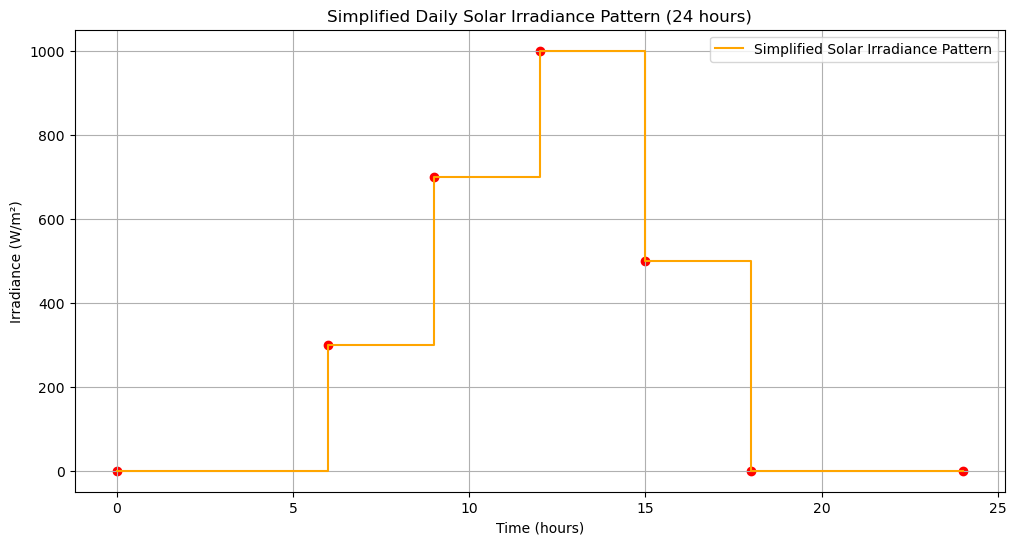

  Time of the Day  Irradiance (W/m²)
0     0:00 - 6:00                  0
1     6:00 - 9:00                300
2    9:00 - 12:00                700
3   12:00 - 15:00               1000
4   15:00 - 18:00                500
5   18:00 - 24:00                  0


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

time_intervals = [0, 6, 9, 12, 15, 18, 24]
irradiance_values = [0, 300, 700, 1000, 500, 0, 0]

# Step plot
plt.figure(figsize=(12, 6))
plt.step(time_intervals, irradiance_values, where='post', label='Simplified Solar Irradiance Pattern', color='orange')
plt.scatter(time_intervals, irradiance_values, color='red')  # Highlight the key points
plt.xlabel('Time (hours)')
plt.ylabel('Irradiance (W/m²)')
plt.title('Simplified Daily Solar Irradiance Pattern (24 hours)')
plt.legend()
plt.grid(True)
plt.show()

data = {
    "Time of the Day": ["0:00 - 6:00", "6:00 - 9:00", "9:00 - 12:00", "12:00 - 15:00", "15:00 - 18:00", "18:00 - 24:00"],
    "Irradiance (W/m²)": [0, 300, 700, 1000, 500, 0]
}

df1 = pd.DataFrame(data)

print(df1)


#### Question 7 (5 Marks) 

The ambient temperature in Arrakis that your plant will be operating is $T_{Arr} ^\circ C$. Plot the I-V curve at $1000 W/m^2$ for your ambient temperature. 

Calculate the maximum power that you can extract during the day at this ambient temperature from your panels in order to complete the Maximum Power (W) column in the following table:

In [6]:
data = {
    "Time of the Day": ["0:00 - 6:00", "6:00 - 9:00", "9:00 - 12:00", "12:00 - 15:00", "15:00 - 18:00", "18:00 - 24:00"],
    "Irradiance (W/m²)": [0, 300, 700, 1000, 500, 0],
    "Maximum Power (W)": [ 0 , 0 , 0 , 0 , 0 , 0 ]
}

df2 = pd.DataFrame(data)

print(df2)

  Time of the Day  Irradiance (W/m²)  Maximum Power (W)
0     0:00 - 6:00                  0                  0
1     6:00 - 9:00                300                  0
2    9:00 - 12:00                700                  0
3   12:00 - 15:00               1000                  0
4   15:00 - 18:00                500                  0
5   18:00 - 24:00                  0                  0


#### Question 8 (5 Marks)

Things here get dusty. Assuming a drop in yield of 7% due to dust in your panels, calculate the total number of panels that you will require in order to generate during the day (6:00 - 18:00) the necessary energy in order to charge your loads during the night.  

#### Question 9 (4 Marks)

Your PV panels will be connected to your local grid through a power electronics converter. Assuming that the rated power of each of the converters at your disposal is 1 MW, how many converters do you need in your system?

If the maximum voltage at the DC side of your converter is 1500 V, calculate the number of panels that your can connect in series and in parallel to the DC side of each of your converters.  

#### Bonus Question 2 (3 Marks)

Since your loads (Harvesters and Carryalls) are away during the day when you produce solar power, you need to store your energy in a local battery energy storage system (BESS). 

What considerations do you need to make for selecting and sizing your batttery energy storage system?

__Note__: This information is not generally availble in your lecture notes. 

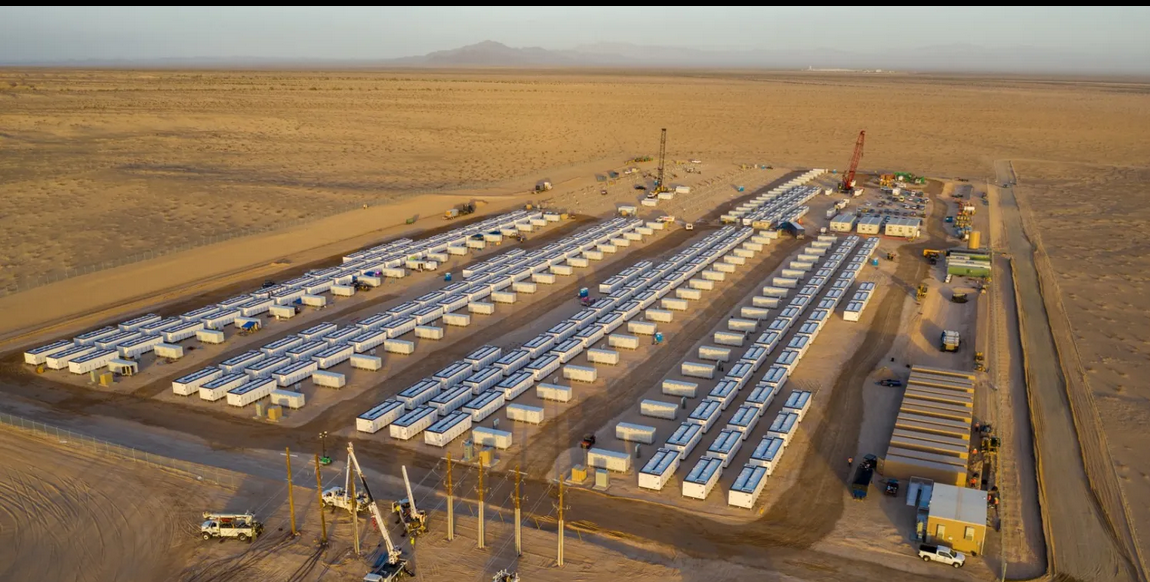

In [7]:
from IPython.display import Image
Image(filename="Figures\DesertBattery.png",height=500)

## Part 2 - The Spice Must Flow (30 Marks)

The spice is central to the economy and the power dynamics between House Harkonnen, the Padishah emperor, the spacing guild and of course, your employer, House Atreides. 

For this reason, the supply of power of the refineries that process the spice is critical.

It ensures that all the essential machinery continues working uninterrupted. 

You are designing a transmission line that supplies the refinery as shown in the following figure. 

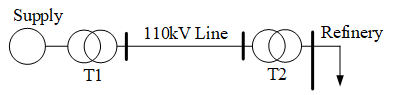

In [8]:
from IPython.display import Image
Image(filename="Figures\PowerSupply.png",height=500)

The parameters of your power system are: 
+ Supply voltage: Rated value 22kV
+ T1: 70 MVA, 22kV / 110kV, $X_{T1}$ %
+ T2: 60 MVA, 110kV / 11kV, $X_{T2}$ %
+ $Z_{line} = R_{line} + j X_{line}$ Ω per phase
+ Load: 5 x refining machines, each rated at 8MW each at $pf_1$ lagging power factor.

#### Question 1 (9 Marks)

If the voltage at the refinery is 11kV, calculate the voltages in per-unit and kV at:

+ The high-voltage side of transformer T2,
+ The high-voltage side of transformer T1,
+ The supply of your system. 


#### Question 2 (3 Marks)

What is the voltage drop across the transmission line. 

#### Question 3 (5 Marks)

Draw the phasor diagram of the voltages corresponding to the above operation. Clearly describe all voltages, currents and other variables. 

__Hints__: Consider the scaling between the voltages and select an appropriate way to visualise your systems. 

#### Question 4 (9 Marks)

Operating at low values of the power factor is not preferable and for that reason, you are looking to improve the power factor at the refinery to be equal to 1. 

During the operation of the refinery, your system may operate with a minimum of three refining machines up to maximum of five refining machines. 

Design a set of capacitor banks that can provide reactive power compensation to unity power factor across all different operating conditions. Assume that the voltage at the refinery is 11kV. 

__Hints__: Calculate the reactive power compensation (kVAr and uF) that needs to be continuously connected for the minimum three machines that are always operating. Then calculate the additional capacitor banks that need to be switched on when a 4th machine and a 5th machine are connected to the refinery. 

#### Question 5 (4 Marks)

Draw in detail (all three phases and all capacitors in the capacitor banks and breakers) the configuration of your reactive power compensation for your system. 

#### Bonus Question 3 (2 Marks)

What is the function of a STATCOM? How does it differ from a capacitor bank?

__Note__: This information is not generally availble in your lecture notes. 

## Part 3 - Transformers

As part of the infrastructure you develop, you are asked to install a charging station for stillsuits. As these suits are a technology developed by the Fremen, the voltages that the charging station operates are not compatible with your existing Arrakis power system. 

For compatibility, you are provided with a single-phase transformer, rated at a power of 75 kVA, frequency of 50 Hz and voltage ratings of 2400 V on the high-voltage side and 300 V on the secondary side. 

Without any further information, Bruce conducts the open-circuit and short-circuit tests of the transformer and gives you back the following results. 

+ __Open-Circuit Test__: 300 V, $I_{oc}$ A, 400 W

+ __Short-Circuit Test__: 72 V, 31.25 A, $P_{sc}$ W

#### Question 1 (2 Marks)

Bruce has not noted down the way he actually conducted the tests, but is absolutely confident that they were performed in the correct way. Explain how the tests were conducted and at which windings were these measurements taken. 

#### Question 2 (4 Marks)

Calculate the values of $R_c$, $X_m$, $R'_{eq}$ and $X′_{eq}$ of the approximate equivalent circuit referred to primary side.

#### Question 3 (2 Marks)

Draw the approximate equivalent circuit referred to high-voltage side of the transformer.

#### Question 4 (2 Marks)

Find the equivalent impedance $Z_{eq}$ in PU using the ratings of the transformer as your base value.

#### Question 5 (5 Marks)

Find the total losses and the efficiency, when the transformer operates with full load current and from 0.1 lagging power factor to unity power factor. Assume load voltage is fixed at 300 V.

#### Question 6 (5 Marks)

Ignoring the shunt branch of the transformer, draw the phasor diagrams for this transformer in per-unit, including:

+ The HV and LV voltages
+ The transformer current
+ The voltages across the series components

for the following loading conditions: 

* Full power at unity power factor
* 75% of the rated power at $pf_2$ lagging power factor
* 40% of the rated power at $pf_3$ leading power factor. 

#### Bonus Question 4 (1 Mark)

One meme question expects one meme answer.